# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [2]:
pip install citipy

Note: you may need to restart the kernel to use updated packages.


In [27]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

weather_api_key

'2b6b0236d564f1d423e54dfe70ac772d'

### Generate the Cities List by Using the `citipy` Library

In [28]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 624


In [9]:
cities

['adamstown',
 'keflavik',
 'kruisfontein',
 'gobabis',
 'leua',
 'globe',
 'harsin',
 'port-aux-francais',
 'invercargill',
 'college',
 'kirensk',
 'srimushnam',
 'nova sintra',
 'anadyr',
 'chernyshevsk',
 'ambon',
 'novo aripuana',
 'taiohae',
 'georgetown',
 'edinburgh of the seven seas',
 'tura',
 'bilibino',
 'fort beaufort',
 'maintirano',
 'newnham',
 'yellowknife',
 'albany',
 'ouellah',
 'tolanaro',
 'kibaya',
 'blackmans bay',
 'flin flon',
 'vadso',
 'zavoronezhskoye',
 'hawaiian paradise park',
 'iskateley',
 'whitehorse',
 'ushuaia',
 'bredasdorp',
 'codrington',
 'puerto natales',
 'kurchatov',
 'walvis bay',
 'lake city',
 'badagry',
 'grytviken',
 'chibougamau',
 'atafu village',
 'petoskey',
 'iqaluit',
 "kapa'a",
 'bethel',
 'daru',
 'west island',
 'khodzha-maston',
 'concepcion del bermejo',
 'waitangi',
 'chonchi',
 'zouerate',
 'punta arenas',
 'papao',
 'jamestown',
 'joacaba',
 'bikenibeu village',
 'tewantin',
 'ippy',
 'orsta',
 'longyearbyen',
 'nieuw amste

---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [29]:
url = f"http://api.openweathermap.org/data/2.5/weather?units=metric&appid={weather_api_key}"
print (url + "&q=san francisco")

http://api.openweathermap.org/data/2.5/weather?units=metric&appid=2b6b0236d564f1d423e54dfe70ac772d&q=san francisco


In [30]:
# Set the API base URL
url = f"http://api.openweathermap.org/data/2.5/weather?units=metric&appid={weather_api_key}"


# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}&q={city}"

    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get (city_url).json ()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather [ "coord" ] [ "lat"]
        city_lng =city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather[ "main" ][ "humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather [ "wind" ] [ "speed" ]
        city_country = city_weather [ "sys" ] [ "country"]
        city_date = city_weather [ "dt"]
        

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | waitangi
Processing Record 2 of Set 1 | mukah
City not found. Skipping...
Processing Record 3 of Set 1 | kayes
Processing Record 4 of Set 1 | fort mcmurray
Processing Record 5 of Set 1 | port-aux-francais
Processing Record 6 of Set 1 | cururupu
Processing Record 7 of Set 1 | at-bashi
Processing Record 8 of Set 1 | petropavlovsk-kamchatsky
Processing Record 9 of Set 1 | coquimbo
Processing Record 10 of Set 1 | cooper's town
Processing Record 11 of Set 1 | mar del plata
Processing Record 12 of Set 1 | lebu
Processing Record 13 of Set 1 | vila franca do campo
Processing Record 14 of Set 1 | chongwe
Processing Record 15 of Set 1 | grytviken
Processing Record 16 of Set 1 | san rafael
Processing Record 17 of Set 1 | bethel
Processing Record 18 of Set 1 | adamstown
Processing Record 19 of Set 1 | ola
Processing Record 20 of Set 1 | kerikeri
Processing Record 21 of Set 1 | avarua
Processing Record 22 of 

Processing Record 40 of Set 4 | san luis de la loma
Processing Record 41 of Set 4 | tabou
Processing Record 42 of Set 4 | enewetak
Processing Record 43 of Set 4 | rio grande
Processing Record 44 of Set 4 | cabo san lucas
Processing Record 45 of Set 4 | walvis bay
Processing Record 46 of Set 4 | leava
Processing Record 47 of Set 4 | mount gambier
Processing Record 48 of Set 4 | vorgashor
Processing Record 49 of Set 4 | oriximina
Processing Record 0 of Set 5 | taltal
Processing Record 1 of Set 5 | sparks
Processing Record 2 of Set 5 | ilulissat
Processing Record 3 of Set 5 | belebey
Processing Record 4 of Set 5 | zonguldak
Processing Record 5 of Set 5 | valdivia
Processing Record 6 of Set 5 | igarka
Processing Record 7 of Set 5 | qapqal
City not found. Skipping...
Processing Record 8 of Set 5 | grambling
Processing Record 9 of Set 5 | isola di capo rizzuto
Processing Record 10 of Set 5 | pacific grove
Processing Record 11 of Set 5 | itoman
Processing Record 12 of Set 5 | ust'-kulom
Proce

Processing Record 32 of Set 8 | sorong
Processing Record 33 of Set 8 | casper
Processing Record 34 of Set 8 | al qusayr
Processing Record 35 of Set 8 | sakakah
Processing Record 36 of Set 8 | prince rupert
Processing Record 37 of Set 8 | tobelo
Processing Record 38 of Set 8 | morehead
Processing Record 39 of Set 8 | nguruka
Processing Record 40 of Set 8 | port elizabeth
Processing Record 41 of Set 8 | kirensk
Processing Record 42 of Set 8 | rokytne
Processing Record 43 of Set 8 | ocean shores
Processing Record 44 of Set 8 | cockburn town
Processing Record 45 of Set 8 | antonio enes
Processing Record 46 of Set 8 | markaz-e hukumat-e darweshan
Processing Record 47 of Set 8 | maintirano
Processing Record 48 of Set 8 | pangody
Processing Record 49 of Set 8 | ulsteinvik
Processing Record 0 of Set 9 | selfoss
Processing Record 1 of Set 9 | eyl
Processing Record 2 of Set 9 | portland
Processing Record 3 of Set 9 | springbok
Processing Record 4 of Set 9 | sao domingos do maranhao
Processing Re

Processing Record 19 of Set 12 | tuburan
Processing Record 20 of Set 12 | paramonga
Processing Record 21 of Set 12 | beira
Processing Record 22 of Set 12 | hadibu
Processing Record 23 of Set 12 | puerto aysen
Processing Record 24 of Set 12 | nacala
Processing Record 25 of Set 12 | navan
Processing Record 26 of Set 12 | palmer
Processing Record 27 of Set 12 | paris
Processing Record 28 of Set 12 | fort valley
Processing Record 29 of Set 12 | chipinge
Processing Record 30 of Set 12 | langenhorn
Processing Record 31 of Set 12 | yelizovo
Processing Record 32 of Set 12 | onega
Processing Record 33 of Set 12 | axim
Processing Record 34 of Set 12 | alofi
Processing Record 35 of Set 12 | san juan
Processing Record 36 of Set 12 | horsham
Processing Record 37 of Set 12 | arendal
Processing Record 38 of Set 12 | poronaysk
Processing Record 39 of Set 12 | siwa oasis
Processing Record 40 of Set 12 | hede
Processing Record 41 of Set 12 | berber
Processing Record 42 of Set 12 | arica
Processing Recor

In [31]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          594
Lat           594
Lng           594
Max Temp      594
Humidity      594
Cloudiness    594
Wind Speed    594
Country       594
Date          594
dtype: int64

In [32]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,waitangi,-43.9535,-176.5597,8.23,92,100,1.34,NZ,1699455848
1,kayes,14.0000,-11.0000,38.05,14,42,3.41,ML,1699455850
2,fort mcmurray,56.7268,-111.3810,-0.23,93,100,5.66,CA,1699455851
3,port-aux-francais,-49.3500,70.2167,5.00,95,85,12.11,TF,1699455826
4,cururupu,-1.8283,-44.8683,33.70,42,96,3.82,BR,1699455851


In [38]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [37]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,faya,18.3851,42.4509,22.06,35,21,2.60,SA,1666108228
1,farsund,58.0948,6.8047,13.30,100,0,7.65,NO,1666108228
2,new norfolk,-42.7826,147.0587,11.72,58,12,1.34,AU,1666108230
3,jamestown,42.0970,-79.2353,5.77,77,100,9.77,US,1666107934
4,lanzhou,36.0564,103.7922,14.53,48,59,1.20,CN,1666108230


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

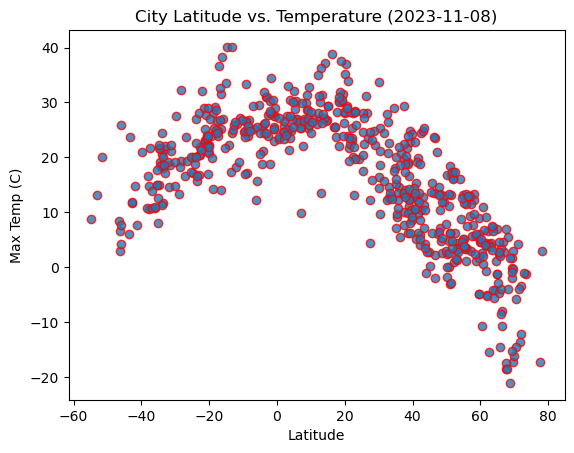

In [43]:
# Build scatter plot for latitude vs. temperature

plt.scatter(
    city_data_df["Lat"],
    city_data_df["Max Temp"],
    edgecolor="red",
    linewidths=1,
    marker="o",
    alpha=0.8,
    label="Cities"
)


# Incorporate the other graph properties
# YOUR CODE HERE

date = time.strftime("%Y-%m-%d")
plt.title(f"City Latitude vs. Temperature ({date})")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (C)")

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()




#### Latitude Vs. Humidity

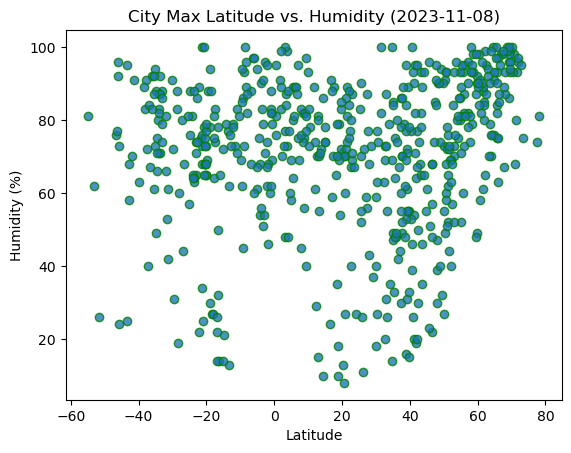

In [44]:

# Build the scatter plots for latitude vs. humidity
plt.scatter(
    city_data_df["Lat"],
    city_data_df["Humidity"],
    edgecolor="green",
    linewidths=1,
    marker="o",
    alpha=0.8,
    label="Cities"
)

# Incorporate the other graph properties
date = time.strftime("%Y-%m-%d")
plt.title(f"City Max Latitude vs. Humidity ({date})")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()



#### Latitude Vs. Cloudiness

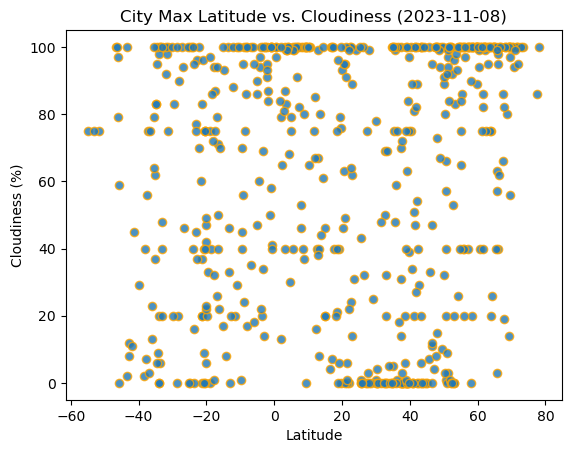

In [45]:

# Build the scatter plots for latitude vs. cloudiness
plt.scatter(
    city_data_df["Lat"],
    city_data_df["Cloudiness"],
    edgecolor="orange",
    linewidths=1,
    marker="o",
    alpha=0.8,
    label="Cities"
)

# Incorporate the other graph properties
date = time.strftime("%Y-%m-%d")
plt.title(f"City Max Latitude vs. Cloudiness ({date})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()




#### Latitude vs. Wind Speed Plot

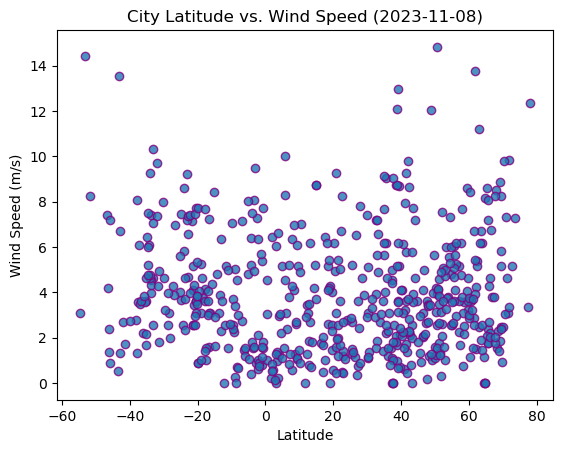

<Figure size 640x480 with 0 Axes>

In [46]:

# Build the scatter plots for latitude vs. wind speed
plt.scatter(
    city_data_df["Lat"],
    city_data_df["Wind Speed"],
    edgecolor="purple",
    linewidths=1,
    marker="o",
    alpha=0.8,
    label="Cities"
)

# Incorporate the other graph properties
date = time.strftime("%Y-%m-%d")
plt.title(f"City Latitude vs. Wind Speed ({date})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()


# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [47]:


# Define a function to create Linear Regression plots
def plot_linear_regression(x_value, y_value, title, text_coord):
  
    
    # Compute linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)
    regress_value = x_value * slope + intercept
    line_eq = f"y = {round(slope,2)}x + {round(intercept,2)}"

    plt.scatter(x_value, y_value)
    plt.plot(x_value, regress_value, "-")
    plt.annotate(line_eq, text_coord, fontsize=15, color="red")
    plt.xlabel("Lat")
    plt.ylabel(title)
    print(f"The r-value is {rvalue ** 2}")
    plt.show()


In [48]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE

northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()



,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,faya,18.3851,42.4509,22.06,35,21,2.60,SA,1666108228
1,farsund,58.0948,6.8047,13.30,100,0,7.65,NO,1666108228
3,jamestown,42.0970,-79.2353,5.77,77,100,9.77,US,1666107934
4,lanzhou,36.0564,103.7922,14.53,48,59,1.20,CN,1666108230
6,albany,42.6001,-73.9662,10.36,74,29,2.10,US,1666108231


In [49]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,new norfolk,-42.7826,147.0587,11.72,58,12,1.34,AU,1666108230
5,ushuaia,-54.8000,-68.3000,8.81,81,75,3.09,AR,1666108231
7,carnarvon,-24.8667,113.6333,20.02,76,0,7.46,AU,1666108232
9,saint-pierre,-21.3393,55.4781,22.82,68,0,5.14,RE,1666108236
10,colorado,-22.8375,-51.9731,20.36,86,96,4.69,BR,1666107965


###  Temperature vs. Latitude Linear Regression Plot

The r-value is 0.7161472181434118


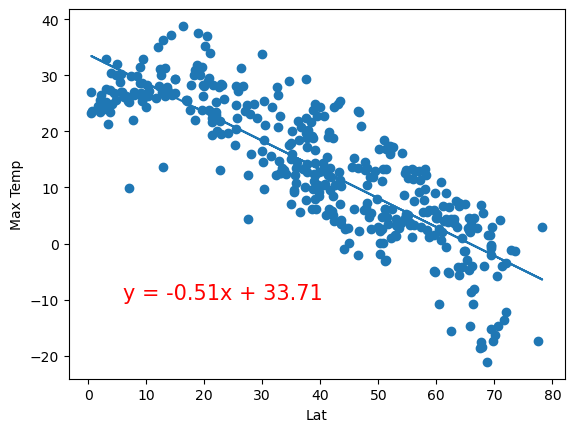

In [50]:

# Linear regression on Northern Hemisphere
# YOUR CODE HERE
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']
plot_linear_regression(x_values, y_values, 'Max Temp', (6, -10))


The r-value is 0.41210571686072434


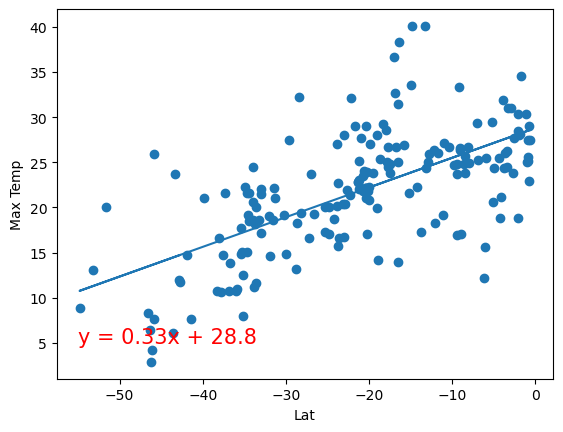

In [51]:
# Linear regression on Southern Hemisphere
# Linear regression on Southern Hemisphere
# YOUR CODE HERE
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']
plot_linear_regression(x_values, y_values, 'Max Temp', (-55, 5))



**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-value is 0.05689741545789598


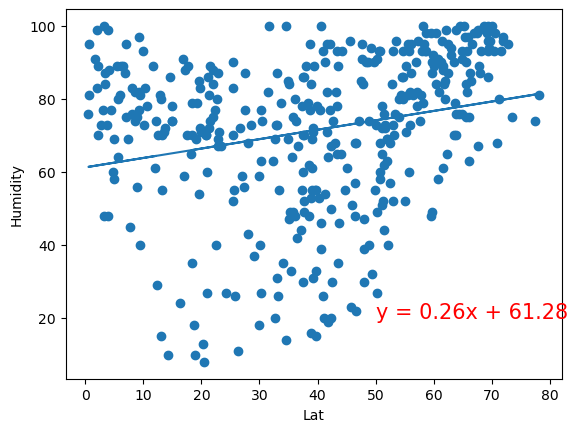

In [52]:
# Northern Hemisphere
# YOUR CODE HERE
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, "Humidity", (50, 20))


The r-value is 0.0002808747046324606


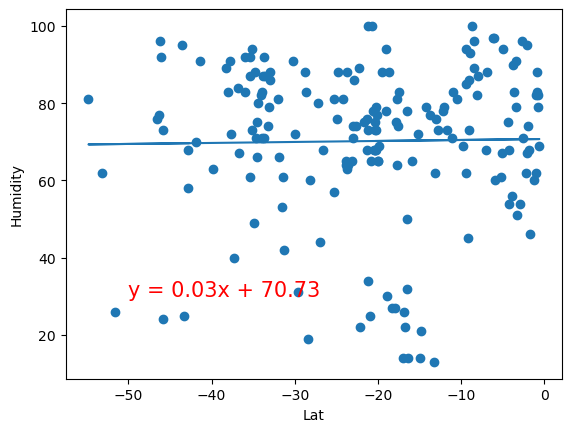

In [53]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, "Humidity", (-50, 30))


**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is 0.024026517125811032


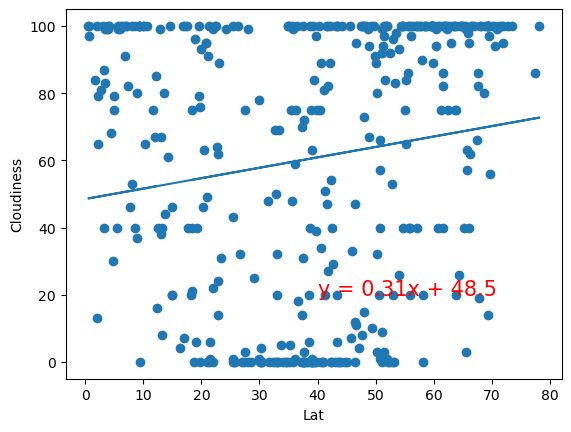

In [54]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, "Cloudiness", (40, 20))


The r-value is 0.02056735429994368


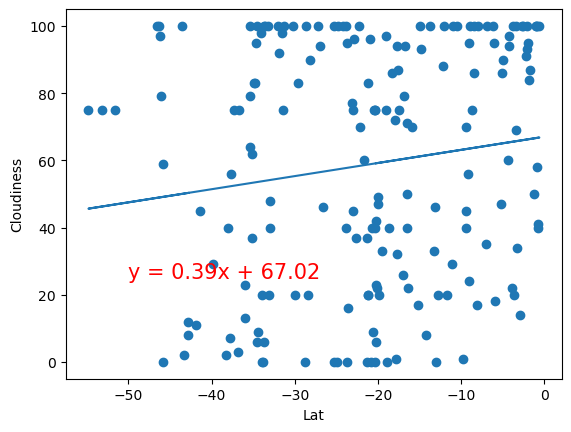

In [56]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, "Cloudiness", (-50, 25))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is 0.030396762354449474


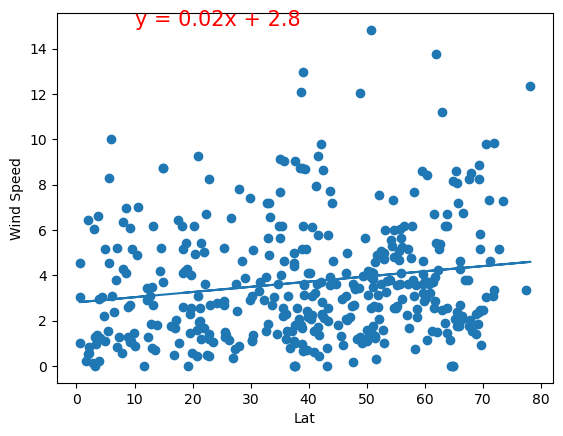

In [59]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, "Wind Speed", (10, 15))

The r-value is 0.06223904070051575


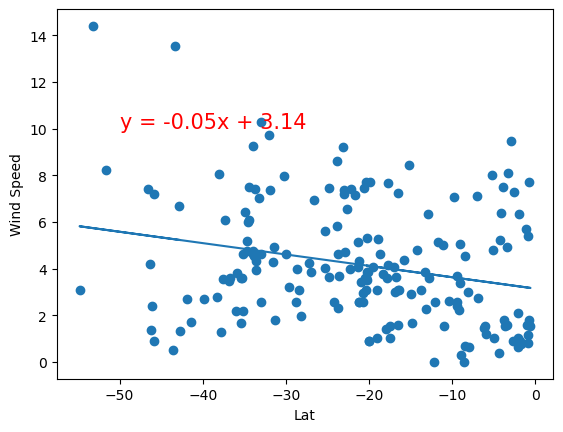

In [60]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, "Wind Speed", (-50, 10))

**Discussion about the linear relationship:** YOUR RESPONSE HERE